In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm
import math

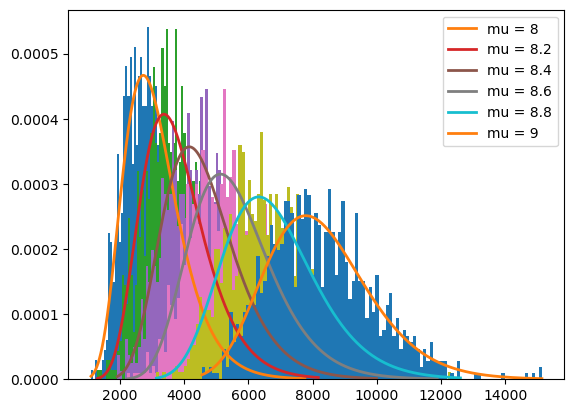

In [39]:
# mu = 8  # Mean of the logarithm of the variable
# sigma = 0.3  # Standard deviation of the logarithm of the variable

mus = [8, 8.2, 8.4, 8.6, 8.8, 9]  # Mean of the logarithm of the variable += 2
sigmas = [0.3, 0.28, 0.26, 0.24, 0.22, 0.2]  # Standard deviation of the logarithm of the variable

for mu, sigma in zip(mus, sigmas): 
    s = np.random.lognormal(mu, sigma, 1000)
    count, bins, ignored = plt.hist(s, 100, density=True, align='mid')
    x = np.linspace(min(bins), max(bins), 10000)
    pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))
        / (x * sigma * np.sqrt(2 * np.pi)))
    plt.plot(x, pdf, linewidth=2, label='mu = {}'.format(mu))
plt.legend()
plt.show()


1.38
0.16
4.077972791053841


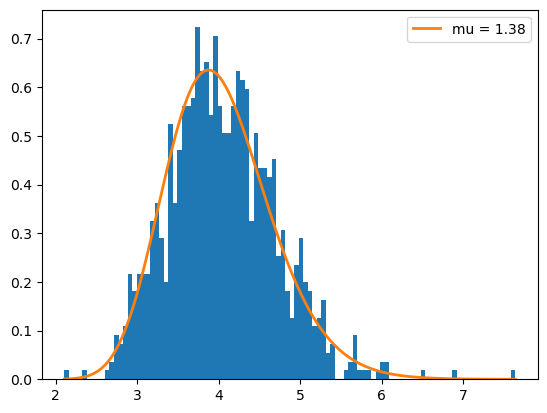

In [38]:
# exp(mu + sigma^2) = 3.75
# calculate sigma if mu is 1.
mu = 1.38
# sigma = math.sqrt(math.log(3.75 / math.exp(mu)))
sigma = 0.16
print(mu)
print(sigma)
print(math.exp(mu+sigma ** 2))

s = np.random.lognormal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 100, density=True, align='mid')
x = np.linspace(min(bins), max(bins), 10000)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))
    / (x * sigma * np.sqrt(2 * np.pi)))
plt.plot(x, pdf, linewidth=2, label='mu = {}'.format(mu))
# changes x axis
plt.legend()
plt.show()

In [ ]:
import cupy as cp

samples = 100000

In [40]:
for mu_t in [8, 8.2, 8.4, 8.6]:
    sigma_t = 0.3
    mu_l = 1.38
    sigma_l = 0.16

    C_bl = math.exp(mu_t + mu_l + (sigma_t ** 2) / 2 + (sigma_l ** 2) / 2) * 10

In [99]:
C_bc = cp.random.lognormal(mu_t, sigma_t, samples) * cp.random.lognormal(mu_l, sigma_l, samples)
V_bl = cp.random.normal(0.8, 0.1, samples)
V_bc = 0

In [106]:
V_bl = cp.random.normal(0.2, 0.1, samples)
V_bc = 1

In [107]:
cp.sum((C_bl*V_bl + C_bc*V_bc) / (C_bl + C_bc) < 0.5) / samples


array(0.99323)

In [108]:
0.986 ** 32

0.6368853778742127

In [63]:
C_bc

array([ 7339.31040848, 17205.20869514,  7107.43457671,  6894.06429851,
       14796.81601695,  8554.65734871, 18654.5612395 , 15654.5174563 ,
       21515.63970602, 11304.86107745])